In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ipyvolume as ipv
from matplotlib import cm


In [2]:
'''Boundary conditions'''
def Condições_de_contorno(V, Rede, L_2, V_0ext, V_0int):
    
    V[:, -1] = V_0ext
    V[-1, :] = V_0ext
    V[0,:] = V[1,:]
    V[:,0] = V[:,1]
    
    V[0:L_2+1,0:L_2+1] = V_0int
    
    return V

In [3]:
def plota_rede(V):
    plt.matshow(V, cmap = cm.inferno)
    plt.show()

In [4]:
def espelha_potencial(V):
    V = np.concatenate((np.flip(V[1:,1:], axis = 0), V[1:,1:]))
    V = np.concatenate((np.flip(V, axis = 1), V), axis = 1)
    return V

In [5]:
def Laplace_quadrado(Rede, L, V_0ext, V_0int, V_0ints):
    '''
    ----------------------------------------------------------------------
    Here we make a function to calculate the Laplace's model
    Give all start conditions(V_0ext and V_0int), lenght of square and net
    ----------------------------------------------------------------------
    Return the Potential in all points of the system with Laplace's model.
    '''
    
    Rede_2 = int(Rede/2)
    L_2 = int(L/2)
    plt.style.use("classic")

    #Starting variables
    
    contador = 0
    delta = 1.
    
    #Construct Net
    
    #V = np.zeros((Rede_2 + 1, Rede_2 + 1))
    V = np.full((Rede_2 + 1 ,Rede_2 + 1), V_0ints)
    V = Condições_de_contorno(V, Rede_2, L_2, V_0ext, V_0int)
    V = np.full((Rede_2 + 1 ,Rede_2 + 1), V_0ints)
    
    plota_rede(espelha_potencial(V))
    
    while delta > 10**(-6):
        avg = np.roll(V,1,axis=0)+np.roll(V,-1,axis=0)+np.roll(V,1,axis=1)+np.roll(V,-1,axis=1)         
        V_n =avg/4. 
        
        V_n = Condições_de_contorno(V_n, Rede_2, L_2, V_0ext, V_0int)

        delta = np.max(np.absolute(V_n - V)) #Calcula a máxima variação de potencial na iteração

        V = V_n
        contador += 1

    V = espelha_potencial(V)
    plota_rede(V)

    
    return V

## Eletric Potential

In [10]:
def plota_potencial(V, Rede):
    """Plot of potencial and curv levels"""
    colormap = cm.inferno
    
    max_ = np.max(V)
    color = colormap(abs(V)/max_)
    
    um = np.full(Rede, 1)
    x = np.outer(um, range(Rede))
    y = np.transpose(np.outer(um, range(Rede)))
    
    ipv.figure()
    ipv.style.use(['classic'])
    mesh = ipv.plot_surface(x, V/max_, y, color=color[...,:3])
    ipv.xlabel(" ")
    ipv.ylabel("V")
    ipv.zlabel(" ")
    ipv.show()
    
    plt.clf()
    plt.contour(x, y, V, int(len(x)/4), cmap = colormap)
    plt.title("Curvas de nível do potencial")
    plt.show()


## Eletric Field

In [7]:
def campo_eletrico(V, Rede, L):
    '''Calculate the eletric field, need the potential and square specifications'''
    
    Ex = + np.roll(V, 1, axis = 0) - np.roll(V, -1, axis = 0) #Calculate the discrete derivation
    Ey = +np.roll(V, 1, axis = 1) - np.roll(V, -1, axis = 1)
    
    L_i = int((Rede-L)/2)
    L_f = int((Rede+L)/2)
    
    Ex[L_i:L_f,L_i:L_f] = 0. #Campo no condutor
    Ey[L_i:L_f,L_i:L_f] = 0.
    
    return Ex, Ey, np.sqrt(Ex**2 + Ey**2)
    

In [8]:
def plota_campo_eletrico(V, Rede, L):
    '''Plot the intensity of eletric field and your field lines'''
    colormap = cm.inferno
    L_i = int((Rede-L)/2)
    L_f = int((Rede+L)/2)
    
    um = np.full(Rede, 1)
    x = np.outer(um, range(Rede))
    y = np.transpose(np.outer(um, range(Rede)))

    Ex, Ey, E = campo_eletrico(V, Rede, L)

    color1 = colormap(E/np.max(E))

    ipv.figure()
    ipv.style.use(['classic'])
    superficie = ipv.plot_surface(x, E/np.max(E), y, color=color1[...,:3])
    ipv.xlabel(" ")
    ipv.zlabel(" ")
    ipv.ylabel("E")
    ipv.show()
    
    plt.clf()
    plt.streamplot(x, y, Ey, Ex, density=[1., 1.], color = E, cmap='inferno')
    plt.fill_between(np.arange(L_i, L_f, 1), L_i, L_f-1, color = "gray", alpha = 0.5)
    plt.title("Linhas de campo")
    plt.show()


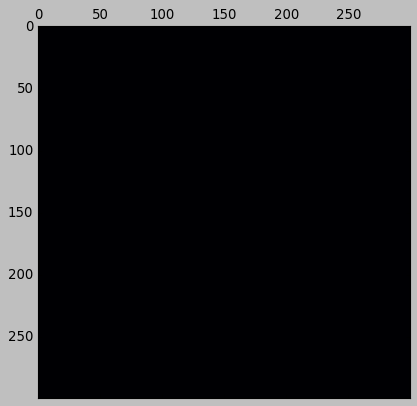

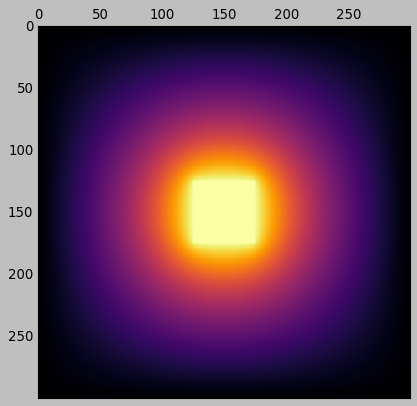

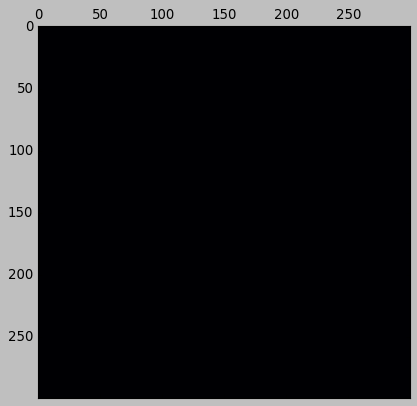

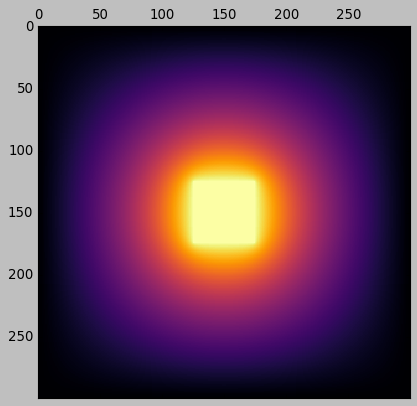

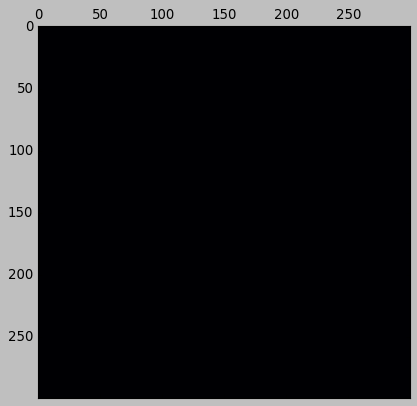

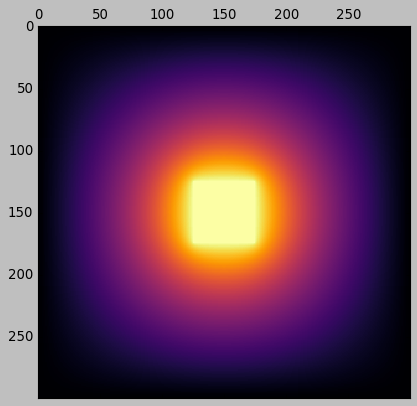

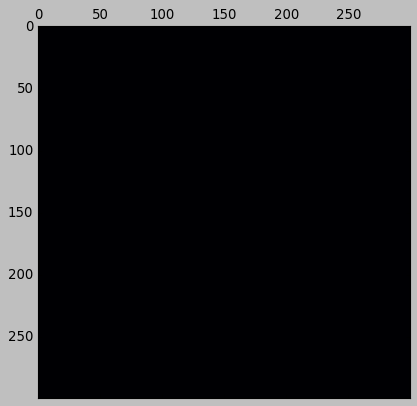

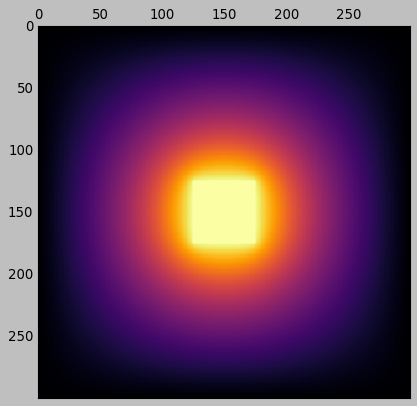

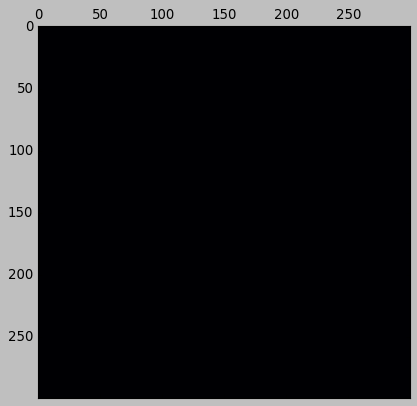

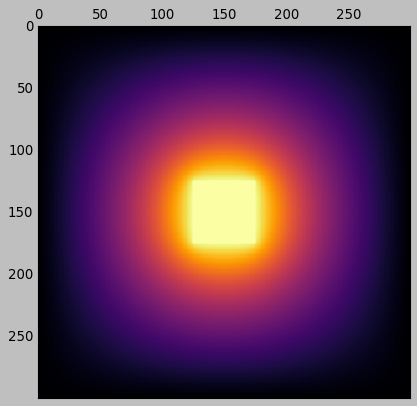

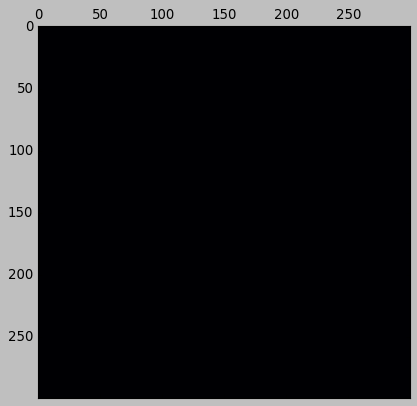

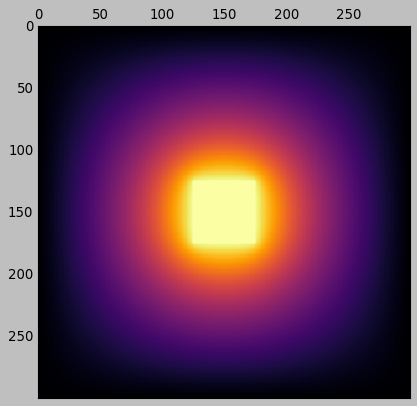

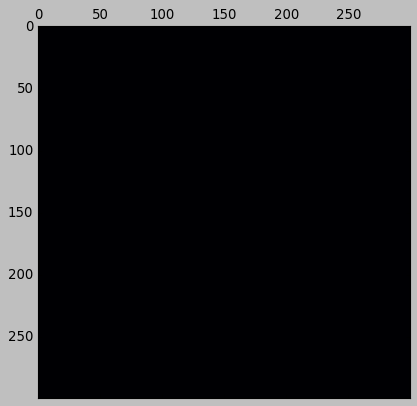

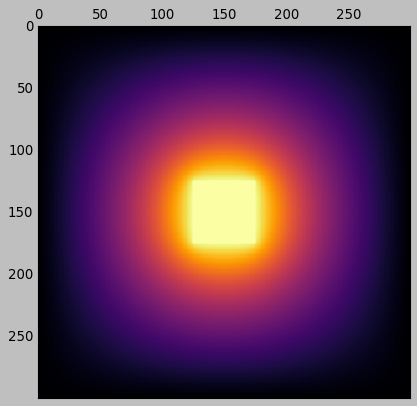

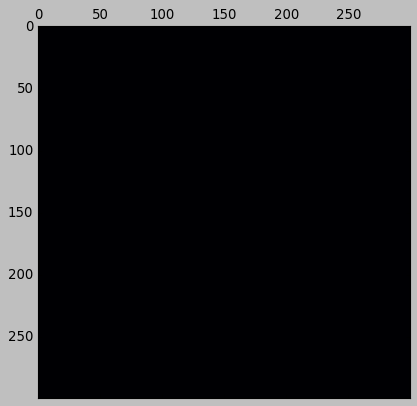

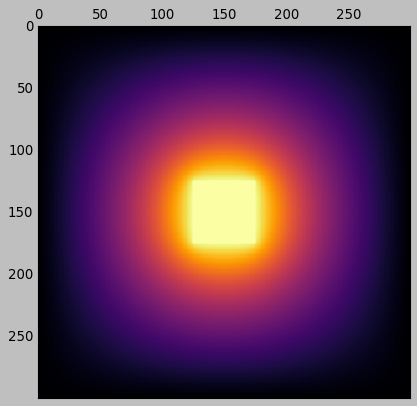

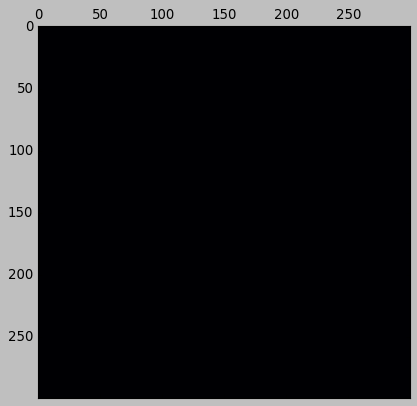

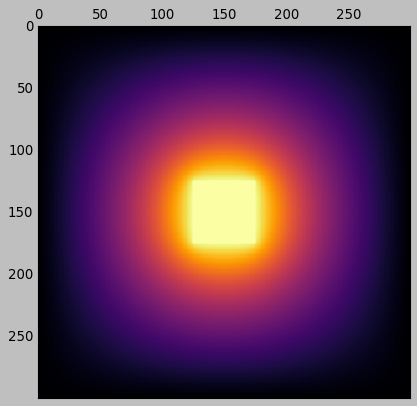

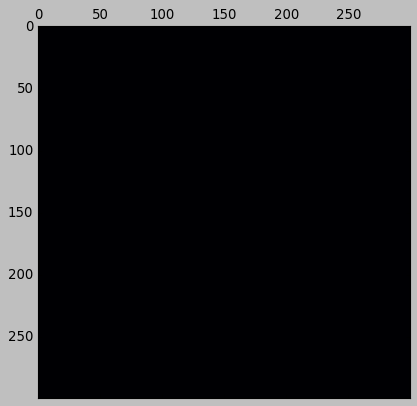

KeyboardInterrupt: 

In [9]:
#%%prun
import time
import timeit
V_0ints = [i for i in range(11)]
V_0ints.append(2.5)
V_0ints.append(3.5)
V_0ints.append(1.5)
temp = []
for i in V_0ints:
    t_0 = timeit.default_timer()
    V_0ext = 0
    V_0int = 5
    V = Laplace_quadrado(300, 50, V_0ext,V_0int,i)
    t_f = timeit.default_timer()
    temp.append(float(t_f-t_0))
    t_f = 0
    t_0 = 0
    #print("tempo : %f s"%(t_f-t_0))

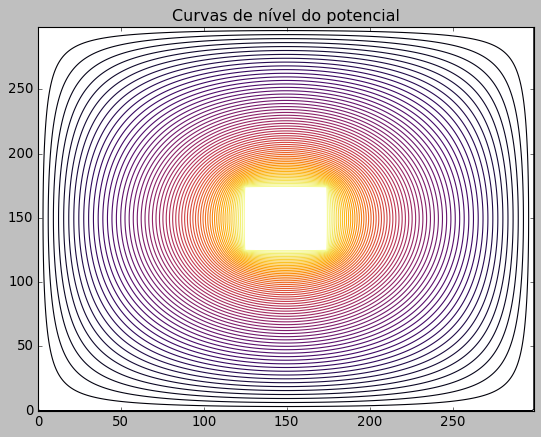

In [106]:
plota_potencial(V, 300)

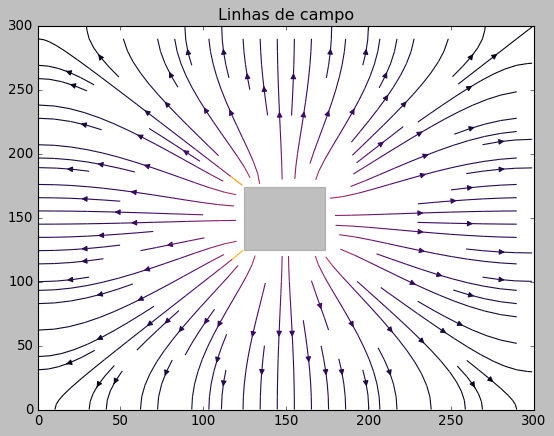

In [107]:
plota_campo_eletrico(V, 300, 50)